### <모델 훈련을 위한 데이터 구성 방법>

1. 수집한 데이터를 이용해서 훈련 : 테스트 또는 훈련 : 검증 : 테스트 데이터로 분류

2. 분류 기준 

    훈련 : 테스트 -> 주로 사용되는 비율은 7:3 또는 7.5:2.5 (7:3 많이 사용함)

    훈련 : 검증 : 테스트 -> 주로 사용되는 비율은 6:2:2 또는 5:2.5:2.5 (6:2:2 많이 사용함)

3. 변수 이름 정의(별도로 정의된 이름은 없지만 주로 많이 사용되는 이름)

    훈련데이터 : 훈련(fit) 시에 사용되는 데이터

               : 독립 변수 이름 : train_input, train_x, X_train, X
               
               : 종속 변수 이름 : train_target, train_y, Y_train, Y

    검증데이터 : 정확도(score)시에 사용되는 데이터

               : 독립 변수 이름 : val_input, val_x, X_val
               
               : 종속 변수 이름 : val_target, val_y, Y_val

    테스트데이터 : 예측(predict)시에 사용되는 데이터

               : 독립 변수 이름 : test_input, test_x, X_test
               
               : 종속 변수 이름 : test_target, test_y, Y_test

### <데이터 분류 순서>

1. 훈련:테스트인 경우에는 비율로 분류만 하면 끝

2. 훈련:검증:테스트인 경우 (6:2:2인 경우)

    - (훈련+검증)과 테스트 데이터로 8:2로 분류
    
    - 훈련과 테스트 데이터를 다시 훈련:검증으로 6:2로 분류

In [1]:
### 사용할 데이터 정의하기

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

len(fish_length),len(fish_weight)

(49, 49)

In [2]:
### 독립 변수 만들기
# - 사용할 변수명 fish_data

fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]

In [3]:
### 종속변수 만들기
# - 사용할 변수명 fish_target

fish_target = [1]*35 +[0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
len(fish_data),len(fish_target)

(49, 49)

### 훈련:테스트 데이터로 분류하기

#### 훈련데이터(train) 만들기

- fish_data 및 fish_target의 앞쪽 35개를 독립/테스트로 사용

- 변수명 : train_input, train_target


In [5]:
# 훈련 독립변수
train_input = fish_data[:35]

# 훈련 종속변수
train_target = fish_target[:35]

#### 테스트 데이터(test) 만들기

- fish_data 및 fish_target의 뒤쪽 14개를 독립/테스트로 사용

- 변수명 : test_input, test_target


In [6]:
# 테스트 독립변수
test_input = fish_data[35:]

# 테스트 종속변수
test_target = fish_target[35:]

### 훈련시키기

In [7]:
#### 모델 생성하기
#- 모델 변수명 : kn 사용 (이웃의 갯수는 디폴트 사용)

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [8]:
### 모델 훈련시키기(fit()함수 사용) 

kn.fit(train_input,train_target)

KNeighborsClassifier()

In [9]:
### 모델 정확도 확인하기(score()함수 사용)
# - 훈련 정확도(훈련 데이터 사용)

train_score = kn.score(train_input,train_target)

In [10]:
# - 테스트 정확도(테스트 데이터 사용)
test_score = kn.score(test_input, test_target)

In [11]:
train_score, test_score

(1.0, 0.0)

### <테스트 데이터가 0점이 나온 원인>

- 훈련과 테스트 데이터 분류 시에 도미 35개를 훈련으로, 빙어 14개를 테스트로 분리하여

  모델 훈련 시에 훈련데이터(도미35)로 훈련이 된 상태에서, 

  테스트 (빙어14)를 맞추려고 하다보니 훈련이 되어 있지 않아서 발생한 문제

- 즉, 훈련데이터가 잘못 구성되어 있음

- 훈련과 테스트 데이터 어느 한쪽에 특정 데이터 성격만 편중된 경우에 발생함

- 이러한 현상을 '샘플링 편향'이라고 합니다.

### <샘플링 편향 해소방법>

- 훈련 및 테스트 데이터로 분류하기 전에 데이터를 잘 섞어야 한다(셔플이라고 함).

In [12]:
# numpy 라이브러리 사용하기
import numpy as np

### <파이썬 리스트[]와 numpy 배열array[]의 차이점>

- 파이썬 리스트 : 다양한 타입의 값들을 넣을 수 있음(문자, 숫자 객체 모두 사용 가능)

- numpy 배열(array) : 한 가지 타입의 데이터만 넣을 수 있음(숫자 값 사용)

In [13]:
### 넘파이 배열 형태를 이용해서 처리하기
# - 기존의 독립 및 종속 데이터를 numpy의 배열 타입으로 형변환 시키기
input_arr= np.array(fish_data)

target_arr = np.array(fish_target)

input_arr, target_arr

len(input_arr), len(target_arr)
input_arr.shape, target_arr.shape

((49, 2), (49,))

### 랜덤하게 섞기

- 랜덤 규칙 정의하기 : 다른 사람과 훈련에 대한 정확도를 비교하기 위해서 주로 사용

- seed() 함수 사용 : 사용되는 값은 의미 없는 규칙임(주로 42번 많이 사용함)

In [14]:
### 독립변수와 종속변수의 인덱스 위치를 동일하게 맞춰서 섞어야 함
# - 랜덤한 인덱스 49개 만들기
# - 배열 49개 숫자 만들기

np.random.seed(42)
index = np.arange(49)
index 

# - 랜덤하게 섞기
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [15]:
### 훈련 및 테스트 데이터로 분류하기
# - 훈련 및 테스트 독립변수(input_arr 데이터에서 index 앞쪽 35개 값을 인덱스 번호로 사용하여 추출하기)
# - 훈련 및 테스트 종속변수(target_arr 데이터에서 index 뒤쪽 14개 값을 인덱스 번호로 사용하여 추출하기)

# - 훈련 데이터
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# - 테스트 데이터
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [16]:
### 훈련 및 테스트 데이터 차원 확인하기
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(35, 2) (35,)
(14, 2) (14,)


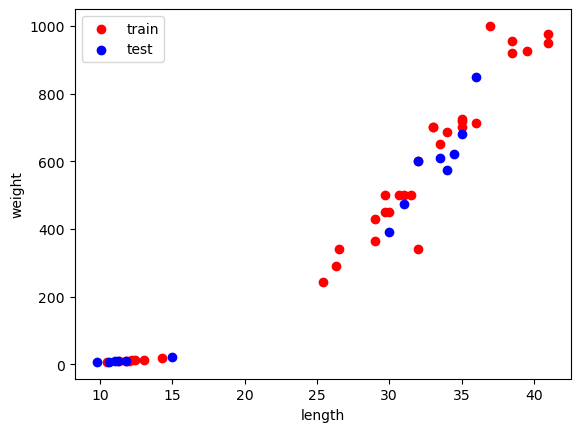

In [17]:
### 훈련 및 테스트 데이터를 이용해서 산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1], c='red',label='train')
plt.scatter(test_input[:,0], test_input[:,1],c='blue', label='test')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend(loc='best')
plt.show();

In [18]:
### 모델생성하기
# 모델 변수명
kn =KNeighborsClassifier(n_neighbors=21)

In [19]:
kn.fit(train_input,train_target)

KNeighborsClassifier(n_neighbors=21)

In [20]:
### 훈련 정확도 확인하기
train_score = kn.score(train_input,train_target)
train_score

0.7714285714285715

In [21]:
### 테스트 정확도 확인하기
test_score = kn.score(test_input,test_target)
test_score

0.5714285714285714

In [22]:
### 테스트 데이터로 예측하기
test_pred =kn.predict(test_input)

### 예측값
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
### 실제 정답 
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### 이웃의 갯수 튜닝하기

In [24]:
# - 정확도가 가장 높을 때의 이웃의 갯수를 담을 변수
ncnt = 0

# - 정확도가 가장 높을 때의 정확도를 담을 변수
nscore = 0

for n in range(3,len(train_input),2):
    kn.n_neighbors = n
    # - 이미 모델 객체가 생성되어 있는 경우는 score()만 가지고도 정확도 확인 가능하기에 fit은 생략 가능 -> score()함수 내에서도 fit을 자동 수행하고 있음
    kn.fit(train_input,train_target)
    score = kn.score(train_input, train_target)
    #print(n,score)
    # 1보다 작은 정확도인 경우만 처리
    if score < 1:
        # 담아놓은 nscore의 값이 현재 score보다 작은 경우에는 현재 score로 교체하기
        if nscore < score:
            nscore = score
            # 이때의 n(이웃의 갯수)를 ncnt 변수에 담아 놓기
            ncnt = n

print(f'ncnt={ncnt} / nscore={nscore}')

ncnt=17 / nscore=0.7714285714285715


In [25]:
### 데이터분류 방법(2)
print(fish_data,'\n\n',fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]] 

 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
### 데이터를 섞으면서 분류하는 라이브러리 사용
# - 머신러닝 딥러닝에서 데이터분류시 가장 많이 사용하는 함수
from sklearn.model_selection import train_test_split


In [27]:
fish_data_arr = np.array(fish_data)
fish_target_arr = np.array(fish_target)

In [28]:
### 훈련과 테스트 데이터로 7:3으로 분류하기
# - 첫 번째  인자 : 독립변수 원본 데이터
# - 두 번째 인자 : 종속변수 원본 데이터
# - test_size : 훈련:테스트의 비율 중에 test의 비율을 작성(1을 기준으로 비율 작성)
# - random_state : 랜덤 규칙 번호 지정
# - stratify : 종속변수의 범주 비율을 훈련과 테스트이 비율대비 편향 없이 조정 시킴
# - 결과값 : 훈련독립, 테스트독립, 훈련종속, 테스트종속의 순서로 데이터가 분류됨

train_input, test_input, train_target, test_target =train_test_split(fish_data_arr, fish_target_arr,
                                                                    test_size=0.3, random_state=42,
                                                                    stratify= fish_target)

In [29]:
print(train_input.shape, train_target.shape)
print(test_input.shape,test_target.shape)

(34, 2) (34,)
(15, 2) (15,)


In [30]:
### 훈련 모델 생성하기
kn = KNeighborsClassifier(n_neighbors=21)

In [31]:
kn.fit(train_input,train_target)

KNeighborsClassifier(n_neighbors=21)

In [32]:
train_score = kn.score(train_input,train_target)
test_score = kn.score(test_input,test_target)

train_score, test_score

(0.7058823529411765, 0.7333333333333333)

In [33]:
### 예측하기
test_pred = kn.predict(test_input)
print(test_pred)
print(test_target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 1 0 1 1 1 1 1 1 1 0 1]


#### <해석>

- 해석은 과대적합과 과소적합이라는 용어를 이용해서 모델 성능을 평가합니다.

- (과대적합)
    
    - 훈련 정확도 > 테스트(or 검증) 정확도, 또는 훈련 정확도가 1인 경우
    
    - 훈련 정확도가 너무 많이 클 경우

- (과소적합)

    - 훈련 정확도 < 테스트(or 검증) 정확도, 또는 테스트(or 검증) 정확도가 1인 경우
    
    - 훈련 정확도는 테스트 정확도보다 무조건 작으면 안됨
    
    - 과대 또는 과소 적합이 일어난 경우에는 훈련모델 성능 향상이 필요하다고 판단한다.

    - 즉, 모델을 사용할 수 없음

- (모델 선정 기준)

    - 과소적합이 일어나지 않아야 함
    
    - 훈련 정확도가 1이 아니어야 함
    
    - 훈련과 테스트(or 검증) 정확도의 차이가 보통(기준은 아님) 0.1이내인 경우

    * 선정된 모델은 '일반화 모델'이라고 칭한다.

    * 가장 바람직한 크기 비교 : 훈련 > 검증 > 테스트

In [34]:
# - 정확도가 가장 높을 때의 이웃의 갯수를 담을 변수
#ncnt = 0

# - 정확도가 가장 높을 때의 정확도를 담을 변수
#nscore = 0

#for n in range(3,len(train_input),2):
   # kn.n_neighbors = n
    # - 이미 모델 객체가 생성되어 있는 경우는 score()만 가지고도 정확도 확인 가능하기에 fit은 생략 가능 -> score()함수 내에서도 fit을 자동 수행하고 있음
   # kn.fit(train_input,train_target)
  #  score = kn.score(train_input, train_target)
    #print(n,score)
    # 1보다 작은 정확도인 경우만 처리
  #  if score < 1:
        # 담아놓은 nscore의 값이 현재 score보다 작은 경우에는 현재 score로 교체하기
   #     if nscore < score:
   #         nscore = score
   #         # 이때의 n(이웃의 갯수)를 ncnt 변수에 담아 놓기
  #          ncnt = n

#print(f'ncnt={ncnt} / nscore={nscore}')

In [35]:
### 예측
kn.predict([[25,150]])

array([1])

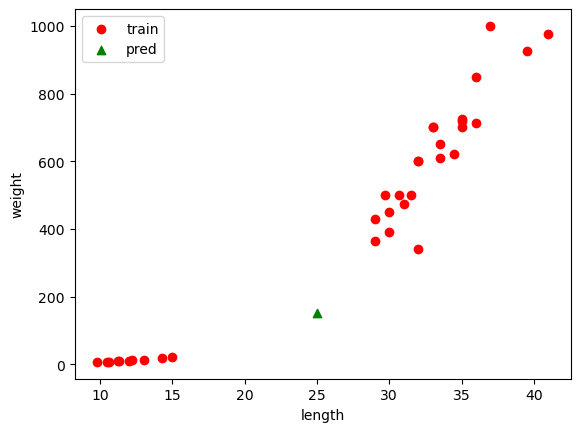

In [36]:
plt.scatter(train_input[:,0],train_input[:,1],c='red',label='train')
plt.scatter(25,150,c='green',marker='^',label='pred')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show();

In [37]:
### 사용된 이웃 데이터 추출하기
_,indexes=kn.kneighbors([[25,150]])

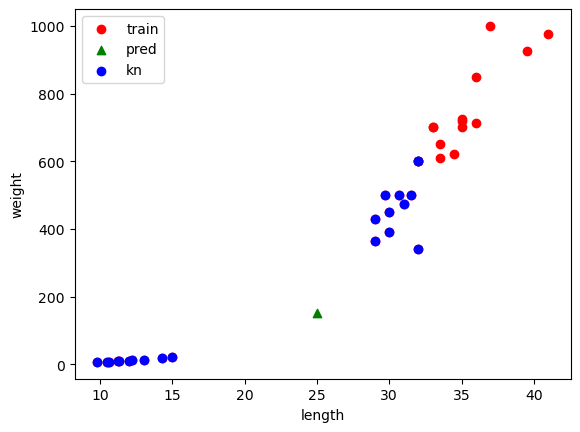

In [38]:
plt.scatter(train_input[:,0],train_input[:,1],c='red',label='train')
plt.scatter(25,150,c='green',marker='^',label='pred')
# 사용된 이웃 표시하기
plt.scatter(train_input[indexes,0],train_input[indexes,1],c='blue',label='kn')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show();

In [39]:
### 이웃의 갯수 5개 사용
kn =KNeighborsClassifier()
kn.fit(train_input,train_target)
test_pred = kn.predict([[25,150]])
_, indexes = kn.kneighbors([[25,150]])

In [40]:
test_pred,indexes

(array([0]), array([[29, 16, 26,  0, 11]], dtype=int64))

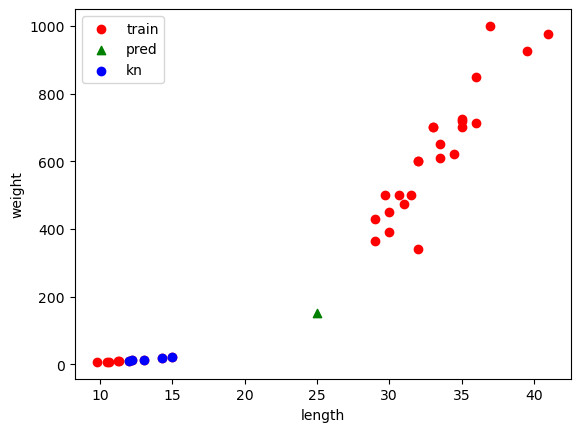

In [41]:
plt.scatter(train_input[:,0],train_input[:,1],c='red',label='train')
plt.scatter(25,150,c='green',marker='^',label='pred')
# 사용된 이웃 표시하기
plt.scatter(train_input[indexes,0],train_input[indexes,1],c='blue',label='kn')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show();

#### 해석

- 예측 결과는 빙어로 확인

- 사용된 특성들의 단위(scale)이 다른 경우 주로 발생함(훈련 데이터의 스케일이 다르다고 표현함)

- 해소 방법 : 데이터의 스케일을 '표준화(정규화)'하는 전처리를 수행함

### <정규화(표준화) 방법>

- 표준점수를 계산하여 사용 가능

- 표준점수 = (각 데이터 - 데이터 전체 평균) / 데이터 전체 표준편차

- 표준점수란 각 데이터가 원점(0)에서 표준편차만큼 얼마나 떨어져 있는지를 나타낸 값

### <정규화(표준화)를 수행하는 시점>

1. 데이터 수집

2. 독립데이터와 종속데이터로 분리

3. 독립 데이터에 대한 --> 정규화(표준화) 처리 가능 (1)

4. 훈련:검증:테스트 데이터로 분류

5. 훈련,검증,테스트 독립 데이터에 대한 --> 정규화(표준화) 처리 가능 (2)

6. 훈련 모델 생성

7. 훈련시키기(fit)

8. 정확도 확인(score)

9. 과대/과소 적합 여부 확인

10. 하이퍼 파라미터 튜닝

11. 6~10 반복 수행

12. 최종 테스트(predict)

In [42]:
### 훈련 독립변수에 대한 전체 평균 구하기
#  표준점수 = (각 데이터 - 데이터 전체 평균) / 데이터 전체 표준편차

mean = np.mean(train_input, axis=0)
print(mean)

### 표준편차 구하기
std = np.std(train_input,axis=0)
print(std)

### 정규화(표준화) 처리하기
train_scaled = (train_input-mean) /std
train_scaled

[ 27.02352941 445.60294118]
[ 10.0816099  319.21122132]


array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

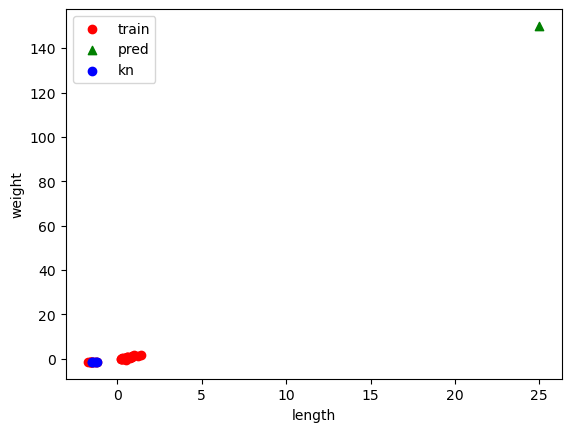

In [43]:
plt.scatter(train_scaled[:,0],train_scaled[:,1],c='red',label='train')
plt.scatter(25,150,c='green',marker='^',label='pred')
# 사용된 이웃 표시하기
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],c='blue',label='kn')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show();

#### <해석>

- 임의의 값(25,150) 값만 다른 위치에 표시됨

- 임의 테스트 데이터도 정규화 작업을 수행해야 한다.


In [44]:
new=([25,150]-mean)/std
new

array([-0.20071491, -0.92604182])

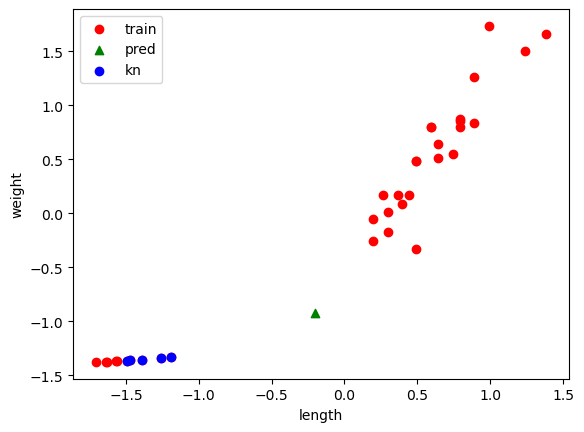

In [45]:
plt.scatter(train_scaled[:,0],train_scaled[:,1],c='red',label='train')
plt.scatter(new[0],new[1],c='green',marker='^',label='pred')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],c='blue',label='kn')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show();

In [46]:
### 정규화 데이터로 훈련 다시 수행하기

kn =KNeighborsClassifier()

kn.fit(train_scaled, train_target)

kn.score(train_scaled, train_target)

1.0

In [47]:
### 정규화(표준화) 처리하기
test_scaled = (test_input-mean) /std
kn.score(test_scaled, test_target)

1.0

In [52]:
### 25, 150으로 예측 후 이웃의 갯수 추출
kn.predict([new])

# 이웃의 인덱스 위치 확인하기
_, indexes = kn.kneighbors([new])
indexes

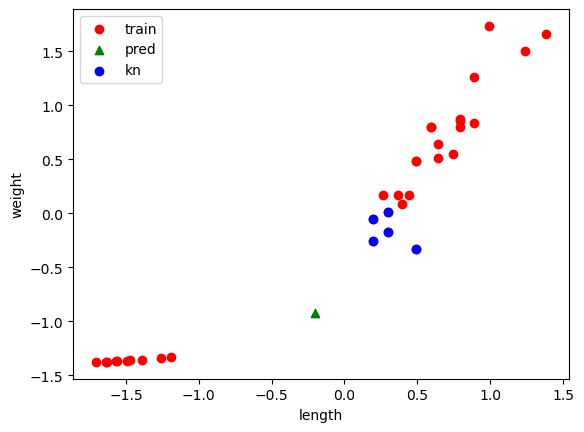

In [53]:
### 그래프 그리기

# 훈련 데이터 전체 표시
plt.scatter(train_scaled[:,0],train_scaled[:,1],c='red',label='train')
# 임의 예측 데이터 표시
plt.scatter(new[0],new[1],c='green',marker='^',label='pred')
# 예측에 사용된 이웃 표시
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],c='blue',label='kn')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show();